<a href="https://colab.research.google.com/github/tintenderete/TFM-Algoritmo-con-redes-evolutivas/blob/main/C_funcion_perdida_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
def perdida_listas(ranking_real, ranking_predicho):
    diferencias = tf.abs(ranking_real - ranking_predicho)
    perdida_total = tf.reduce_sum(diferencias)
    """
    Una opción podría ser cambiar tf.reduce_sum() por tf.reduce_mean() para tomar el promedio de las diferencias en lugar de la suma. Esto hará que la pérdida sea independiente del tamaño del lote de datos.
    """
    return perdida_total


In [3]:
ranking_real = np.array([[6,3,2,4,5,1]])
ranking_real

array([[6, 3, 2, 4, 5, 1]])

In [4]:
ranking_predicho = np.array([[1,2,3,6,5,4]])
ranking_predicho

array([[1, 2, 3, 6, 5, 4]])

In [5]:
diferencias = tf.abs(ranking_real - ranking_predicho)
diferencias

<tf.Tensor: shape=(1, 6), dtype=int64, numpy=array([[5, 1, 1, 2, 0, 3]])>

In [6]:
perdida_total = tf.reduce_sum(diferencias)
perdida_total

<tf.Tensor: shape=(), dtype=int64, numpy=12>

In [7]:
perdida_listas(ranking_real, ranking_predicho)

<tf.Tensor: shape=(), dtype=int64, numpy=12>

# asignar más peso a las diferencias que corresponden a números más bajos en el ranking real.

castiga cuando los mejores estan clasificados como peores

In [8]:
def perdida_listas(ranking_real, ranking_predicho):
    diferencias = tf.abs(ranking_real - ranking_predicho)
    diferencias_ponderadas = diferencias / (ranking_real + 1e-7)  # Añadimos un pequeño número para evitar la división por cero
    perdida_total = tf.reduce_sum(diferencias_ponderadas)
    return perdida_total

In [9]:
ranking_real, ranking_predicho

(array([[6, 3, 2, 4, 5, 1]]), array([[1, 2, 3, 6, 5, 4]]))

In [10]:
diferencias = tf.abs(ranking_real - ranking_predicho)
diferencias

<tf.Tensor: shape=(1, 6), dtype=int64, numpy=array([[5, 1, 1, 2, 0, 3]])>

In [11]:
diferencias_ponderadas = diferencias / (ranking_real + 1e-7)
diferencias_ponderadas.numpy()

array([[0.83333333, 0.33333333, 0.5       , 0.5       , 0.        ,
        3.        ]])

In [12]:
perdida_total = tf.reduce_sum(diferencias_ponderadas)
perdida_total

<tf.Tensor: shape=(), dtype=float64, numpy=5.166666666666667>

In [13]:
perdida_listas(ranking_real, ranking_predicho)

<tf.Tensor: shape=(), dtype=float64, numpy=5.166666666666667>

## inversa

castiga cuando los peores estan clasificados como mejores

In [14]:
ranking_real, ranking_predicho

(array([[6, 3, 2, 4, 5, 1]]), array([[1, 2, 3, 6, 5, 4]]))

In [15]:
diferencias = tf.abs(ranking_real - ranking_predicho)
diferencias

<tf.Tensor: shape=(1, 6), dtype=int64, numpy=array([[5, 1, 1, 2, 0, 3]])>

In [16]:
diferencias_ponderadas = diferencias / (ranking_predicho + 1e-7)
diferencias_ponderadas.numpy()

array([[5.        , 0.5       , 0.33333333, 0.33333333, 0.        ,
        0.75      ]])

In [17]:
def perdida_listas(ranking_real, ranking_predicho):
    ranking_real = tf.cast(ranking_real, tf.float32)
    ranking_predicho = tf.cast(ranking_predicho, tf.float32)
    diferencias = tf.abs(ranking_real - ranking_predicho)
    diferencias_ponderadas = diferencias / (ranking_real + 0.01)  # Añadimos un pequeño número para evitar la división por cero
    perdida_total = tf.reduce_sum(diferencias_ponderadas)
    return perdida_total

In [18]:
def loss_ranking(ranking_real, ranking_predicho):
    ranking_real_float = tf.cast(ranking_real, tf.float32)
    ranking_predicho = tf.cast(ranking_predicho, tf.float32)
    diferencias = tf.abs(ranking_real_float - ranking_predicho)
    diferencias_ponderadas = diferencias / (ranking_predicho + 0.01) # <<<<---------
    perdida_total = tf.reduce_sum(diferencias_ponderadas)
    return abs(perdida_total)

----

In [19]:
diferencias = tf.abs(np.array([1,2,3]) - np.array([10,2,3]))
diferencias

<tf.Tensor: shape=(3,), dtype=int64, numpy=array([9, 0, 0])>

In [20]:
diferencias_ponderadas = diferencias / ( np.array([1,2,3])  + 1e-7)
diferencias_ponderadas.numpy()

array([9., 0., 0.])

In [21]:
loss_ranking(
    np.array([1,2,3]),
    np.array([1,2,10])
    )

<tf.Tensor: shape=(), dtype=float32, numpy=0.6993007>

In [22]:
diferencias = tf.abs(np.array([1,2,3]) - np.array([10,2,3]))
diferencias

<tf.Tensor: shape=(3,), dtype=int64, numpy=array([9, 0, 0])>

In [23]:
diferencias_ponderadas = diferencias / (np.array([10,2,3]) + 1e-7)
diferencias_ponderadas.numpy()

array([0.9, 0. , 0. ])

In [24]:
loss_ranking(
    np.array([1,2,3]),
    np.array([10,2,3])
    )

<tf.Tensor: shape=(), dtype=float32, numpy=0.8991009>

In [25]:
perdida_listas(
    np.array([1,2,3]),
    np.array([1,2,10])
    )

<tf.Tensor: shape=(), dtype=float32, numpy=2.3255813>

In [26]:
perdida_listas(
    np.array([1,2,3]),
    np.array([10,2,3])
    )

<tf.Tensor: shape=(), dtype=float32, numpy=8.910892>

In [27]:
tf.keras.metrics.mean_squared_error(
    np.array([1,2,3]),
    np.array([10,2,3])
)

<tf.Tensor: shape=(), dtype=int64, numpy=27>

In [28]:
tf.keras.metrics.mean_squared_error(
    np.array([1,2,3]),
    np.array([1,2,10])
)

<tf.Tensor: shape=(), dtype=int64, numpy=16>

# ANALISIS FUNCION DE PERDIDA

In [29]:
def loss_ranking(ranking_real, ranking_predicho):
    ranking_real_float = tf.cast(ranking_real, tf.float32)
    ranking_predicho = tf.cast(ranking_predicho, tf.float32)
    diferencias = tf.abs(ranking_real_float - ranking_predicho)
    diferencias_ponderadas = diferencias / (ranking_predicho + 0.01) # <<<<---------
    perdida_total = tf.reduce_sum(diferencias_ponderadas)
    return abs(perdida_total)

def perdida_listas(ranking_real, ranking_predicho):
    ranking_real = tf.cast(ranking_real, tf.float32)
    ranking_predicho = tf.cast(ranking_predicho, tf.float32)
    diferencias = tf.abs(ranking_real - ranking_predicho)
    diferencias_ponderadas = diferencias / (ranking_real + 0.01)  # Añadimos un pequeño número para evitar la división por cero
    perdida_total = tf.reduce_sum(diferencias_ponderadas)
    return perdida_total

def diferencia_listas(ranking_real, ranking_predicho):
    ranking_real = tf.cast(ranking_real, tf.float32)
    ranking_predicho = tf.cast(ranking_predicho, tf.float32)
    diferencias = tf.abs(ranking_real - ranking_predicho)
    perdida_total = tf.reduce_sum(diferencias)
    """
    Una opción podría ser cambiar tf.reduce_sum() por tf.reduce_mean() para tomar el promedio de las diferencias en lugar de la suma. Esto hará que la pérdida sea independiente del tamaño del lote de datos.
    """
    return perdida_total

def mse(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    squared_differences = tf.square(y_true - y_pred)
    mean_squared_error = tf.reduce_mean(squared_differences)
    return mean_squared_error

def mae(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    absolute_differences = tf.abs(y_true - y_pred)
    mean_absolute_error = tf.reduce_mean(absolute_differences)
    return mean_absolute_error

def ndcg(y_true, y_pred):
    # Ordenar los índices de y_true y y_pred en orden descendente
    true_sorted_indices = tf.argsort(y_true, direction='ASCENDING')
    pred_sorted_indices = tf.argsort(y_pred, direction='ASCENDING')

    # Obtener los rangos de clasificación
    true_ranks = tf.argsort(true_sorted_indices)
    pred_ranks = tf.argsort(pred_sorted_indices)

    # Calcular el NDCG
    ndcg = tf.math.reduce_sum((2**y_true - 1) / tf.math.log1p(tf.cast(pred_ranks, tf.float32) + 1))
    ideal_ndcg = tf.math.reduce_sum((2**y_true - 1) / tf.math.log1p(tf.cast(true_ranks, tf.float32) + 1))

    # Normalizar por el valor ideal
    ndcg = ndcg / ideal_ndcg

    return ndcg

from keras import backend as K
def custom_loss(y_true, y_pred):
    weights = K.abs(1. / K.cast(y_true, K.floatx()))  # Mayor peso a rangos más altos
    return K.mean(weights * K.square(y_true - y_pred), axis=-1)


def top_is_target(y_true, y_pred):
  w = np.arange(len(y_true))
  w = w[::-1] + 1
  w[:10] = w[:10] * 1.3
  w = K.cast(w, 'float32')

  r = K.cast(y_true, 'float32')
  r_pred = K.cast(y_pred, 'float32')

  return K.sum(w * K.square(r - r_pred), axis=-1)



In [30]:
r_pred = np.array([[18, 28,  3, 23, 29, 20, 15, 21, 22, 27, 10, 14, 13,  6, 19, 11,
         5, 25,  4, 30,  7, 12, 17, 26,  9,  2,  0, 16,  8, 24,  1]])

r_real = np.array([25, 19, 13, 17, 16, 27, 29, 30, 15,  0,  3, 22,  1,  8,  2, 18, 10,
        4, 20,  6, 12, 26,  7, 14, 24, 23, 21, 11, 28,  5,  9])

r_real = tf.cast(r_real, tf.float32)
r_pred = tf.cast(r_pred, tf.float32)

In [31]:
diferencias = tf.abs(r_pred - r_real)
diferencias

<tf.Tensor: shape=(1, 31), dtype=float32, numpy=
array([[ 7.,  9., 10.,  6., 13.,  7., 14.,  9.,  7., 27.,  7.,  8., 12.,
         2., 17.,  7.,  5., 21., 16., 24.,  5., 14., 10., 12., 15., 21.,
        21.,  5., 20., 19.,  8.]], dtype=float32)>

In [32]:
(r_pred + 0.1)

<tf.Tensor: shape=(1, 31), dtype=float32, numpy=
array([[18.1, 28.1,  3.1, 23.1, 29.1, 20.1, 15.1, 21.1, 22.1, 27.1, 10.1,
        14.1, 13.1,  6.1, 19.1, 11.1,  5.1, 25.1,  4.1, 30.1,  7.1, 12.1,
        17.1, 26.1,  9.1,  2.1,  0.1, 16.1,  8.1, 24.1,  1.1]],
      dtype=float32)>

In [33]:
diferencias_ponderadas = diferencias / (r_pred + 0.0001)
diferencias_ponderadas

<tf.Tensor: shape=(1, 31), dtype=float32, numpy=
array([[3.88886750e-01, 3.21427435e-01, 3.33322239e+00, 2.60868430e-01,
        4.48274314e-01, 3.49998266e-01, 9.33327079e-01, 4.28569406e-01,
        3.18180382e-01, 9.99996305e-01, 6.99993014e-01, 5.71424484e-01,
        9.23069835e-01, 3.33327770e-01, 8.94732177e-01, 6.36357844e-01,
        9.99979973e-01, 8.39996696e-01, 3.99989986e+00, 7.99997330e-01,
        7.14275479e-01, 1.16665697e+00, 5.88231862e-01, 4.61536705e-01,
        1.66664815e+00, 1.04994755e+01, 2.10000000e+05, 3.12498063e-01,
        2.49996877e+00, 7.91663408e-01, 7.99919987e+00]], dtype=float32)>

In [34]:
perdida_total = tf.reduce_sum(diferencias_ponderadas)
perdida_total

<tf.Tensor: shape=(), dtype=float32, numpy=210045.19>

[-1.         -0.94117647 -0.88235294 -0.82352941 -0.76470588 -0.70588235
 -0.64705882 -0.58823529 -0.52941176 -0.47058824 -0.41176471 -0.35294118
 -0.29411765 -0.23529412 -0.17647059 -0.11764706 -0.05882353  0.
  0.05882353  0.11764706  0.17647059  0.23529412  0.29411765  0.35294118
  0.41176471  0.47058824  0.52941176  0.58823529  0.64705882  0.70588235
  0.76470588  0.82352941  0.88235294  0.94117647  1.        ]
[ 1.         -1.         -0.94117647 -0.88235294 -0.82352941 -0.76470588
 -0.70588235 -0.64705882 -0.58823529 -0.52941176 -0.47058824 -0.41176471
 -0.35294118 -0.29411765 -0.23529412 -0.17647059 -0.11764706 -0.05882353
  0.          0.05882353  0.11764706  0.17647059  0.23529412  0.29411765
  0.35294118  0.41176471  0.47058824  0.52941176  0.58823529  0.64705882
  0.70588235  0.76470588  0.82352941  0.88235294  0.94117647]
loss ranking: tf.Tensor(7.2535243, shape=(), dtype=float32)
perdida_listas: tf.Tensor(3.3707833, shape=(), dtype=float32)
mse: tf.Tensor(0.117647074, shap

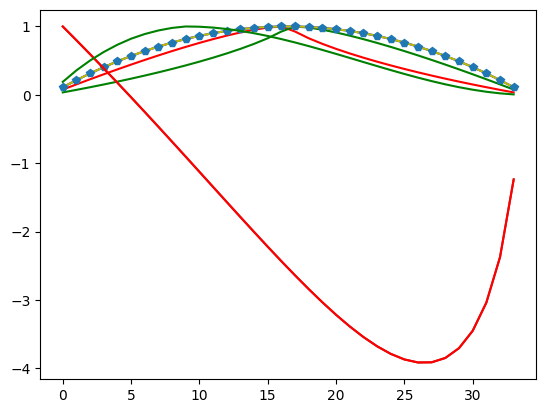

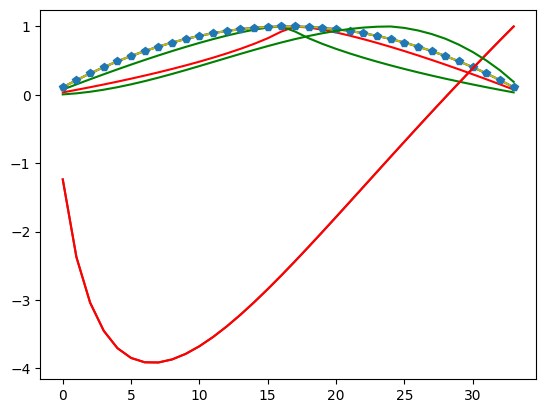

In [35]:
import matplotlib.pyplot as plt

ranking = np.arange(35)

ranking = 2*(ranking - min(ranking)) / (max(ranking) - min(ranking)) - 1
print(ranking)
loss_loss_ranking = []
loss_perdida_listas = []
loss_mse = []
loss_diferencia_listas = []
loss_mae = []
loss_ndcg = []
loss_custom_loss = []
loss_top_is_target = []

for i in range(len(ranking)-1) :
  #pred_ranking = np.roll(ranking, -i-1)
  pred_ranking = np.roll(ranking, i+1)
  print(pred_ranking)
  loss = loss_ranking(ranking, pred_ranking )
  loss_loss_ranking.append(loss)
  print("loss ranking: " + str(loss))
  loss = perdida_listas(ranking, pred_ranking )
  loss_perdida_listas.append(loss)
  print("perdida_listas: " + str(loss))
  loss = mse(ranking, pred_ranking )
  loss_mse.append(loss)
  print("mse: " + str(loss))
  loss = diferencia_listas(ranking, pred_ranking )
  loss_diferencia_listas.append(loss)
  print("diferencia_listas: " + str(loss))
  loss = mae(ranking, pred_ranking )
  loss_mae.append(loss)
  print("mae: " + str(loss))
  loss = ndcg(ranking, pred_ranking )
  loss_ndcg.append(loss)
  print("loss_ndcg: " + str(loss))
  loss = ndcg(ranking, pred_ranking )
  loss_custom_loss.append(loss)
  print("loss_custom_loss: " + str(loss))
  loss = top_is_target(ranking, pred_ranking )
  loss_top_is_target.append(loss)
  print("top_is_target: " + str(loss))

loss_loss_ranking = np.array(loss_loss_ranking)
loss_perdida_listas = np.array(loss_perdida_listas)
loss_mse = np.array(loss_mse)
loss_diferencia_listas = np.array(loss_diferencia_listas)
loss_mae = np.array(loss_mae)
loss_ndcg = np.array(loss_ndcg)
loss_custom_loss = np.array(loss_custom_loss)
loss_top_is_target = np.array(loss_top_is_target)

plt.figure()
plt.plot(loss_loss_ranking / loss_loss_ranking.max(), 'r');
plt.plot(loss_perdida_listas / loss_perdida_listas.max(), 'g');
plt.plot(loss_mse / loss_mse.max(), 'b');
plt.plot(loss_diferencia_listas / loss_diferencia_listas.max(), 'y');
plt.plot(loss_mae / loss_mae.max(), 'p');
plt.plot(loss_ndcg / loss_ndcg.max(), 'brown');
plt.plot(loss_custom_loss / loss_custom_loss.max(), 'r');
plt.plot(loss_top_is_target / loss_top_is_target.max(), 'g');
print("---------------------")

loss_loss_ranking = []
loss_perdida_listas = []
loss_mse = []
loss_diferencia_listas = []
loss_mae = []
loss_ndcg = []
loss_custom_loss = []
loss_top_is_target = []

for i in range(len(ranking)-1):
  pred_ranking = np.roll(ranking, -i-1)
  #pred_ranking = np.roll(ranking, i+1)
  print(pred_ranking)
  loss = loss_ranking(ranking, pred_ranking )
  loss_loss_ranking.append(loss)
  print("loss ranking: " + str(loss))
  loss = perdida_listas(ranking, pred_ranking )
  loss_perdida_listas.append(loss)
  print("perdida_listas: " + str(loss))
  loss = mse(ranking, pred_ranking )
  loss_mse.append(loss)
  print("mse: " + str(loss))
  loss = diferencia_listas(ranking, pred_ranking )
  loss_diferencia_listas.append(loss)
  print("diferencia_listas: " + str(loss))
  loss = mae(ranking, pred_ranking )
  loss_mae.append(loss)
  print("mae: " + str(loss))
  loss = ndcg(ranking, pred_ranking )
  loss_ndcg.append(loss)
  print("loss_ndcg: " + str(loss))
  loss = ndcg(ranking, pred_ranking )
  loss_custom_loss.append(loss)
  print("loss_custom_loss: " + str(loss))
  loss = top_is_target(ranking, pred_ranking )
  loss_top_is_target.append(loss)
  print("top_is_target: " + str(loss))

plt.figure()
loss_loss_ranking = np.array(loss_loss_ranking)
loss_perdida_listas = np.array(loss_perdida_listas)
loss_mse = np.array(loss_mse)
loss_diferencia_listas = np.array(loss_diferencia_listas)
loss_mae = np.array(loss_mae)
loss_ndcg = np.array(loss_ndcg)
loss_custom_loss = np.array(loss_custom_loss)
loss_top_is_target = np.array(loss_top_is_target)

plt.plot(loss_loss_ranking / loss_loss_ranking.max(), 'r');
plt.plot(loss_perdida_listas / loss_perdida_listas.max(), 'g');
plt.plot(loss_mse / loss_mse.max(), 'b');
plt.plot(loss_diferencia_listas / loss_diferencia_listas.max(), 'y');
plt.plot(loss_mae / loss_mae.max(), 'p');
plt.plot(loss_ndcg / loss_ndcg.max(), 'brown');
plt.plot(loss_custom_loss / loss_custom_loss.max(), 'r');
plt.plot(loss_top_is_target / loss_top_is_target.max(), 'g');



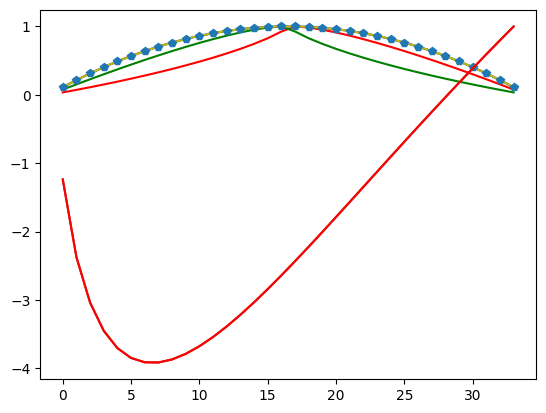

In [36]:
plt.plot(loss_loss_ranking / loss_loss_ranking.max(), 'r');
plt.plot(loss_perdida_listas / loss_perdida_listas.max(), 'g');
plt.plot(loss_mse / loss_mse.max(), 'b');
plt.plot(loss_diferencia_listas / loss_diferencia_listas.max(), 'y');
plt.plot(loss_mae / loss_mae.max(), 'p');
plt.plot((loss_ndcg / loss_ndcg.max()), 'brown');
plt.plot(loss_custom_loss / loss_custom_loss.max(), 'r');

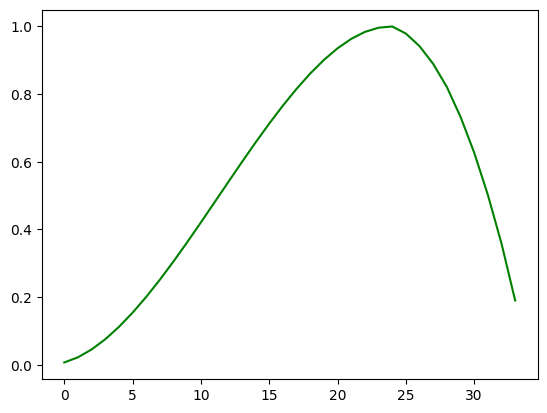

In [37]:
plt.plot(loss_top_is_target / loss_top_is_target.max(), 'g');

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34  0]
top_is_target: tf.Tensor(1872.0, shape=(), dtype=float32)
[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34  0  1]
top_is_target: tf.Tensor(6123.0, shape=(), dtype=float32)
[ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31 32 33 34  0  1  2]
top_is_target: tf.Tensor(12543.0, shape=(), dtype=float32)
[ 4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34  0  1  2  3]
top_is_target: tf.Tensor(20922.0, shape=(), dtype=float32)
[ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 34  0  1  2  3  4]
top_is_target: tf.Tensor(31050.0, shape=(), dtype=float32)
[ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 2

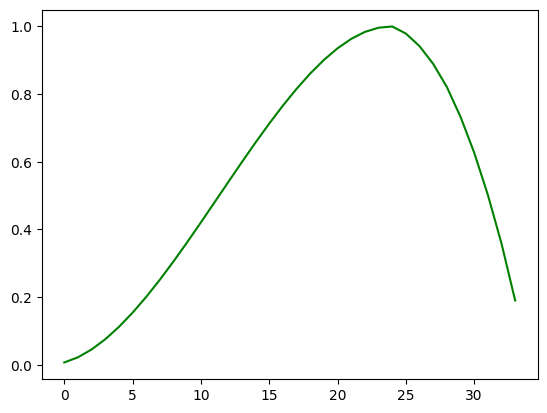

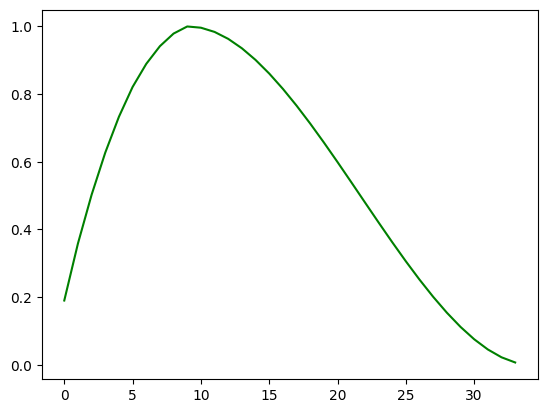

In [38]:
ranking = np.arange(35)

#ranking = 2*(ranking - min(ranking)) / (max(ranking) - min(ranking)) - 1
print(ranking)

loss_top_is_target = []

for i in range(len(ranking)-1):
  pred_ranking = np.roll(ranking, -i-1)
  #pred_ranking = np.roll(ranking, i+1)
  print(pred_ranking)
  loss = top_is_target(ranking, pred_ranking )
  loss_top_is_target.append(loss)
  print("top_is_target: " + str(loss))

plt.figure()

loss_top_is_target = np.array(loss_top_is_target)

plt.plot(loss_top_is_target / loss_top_is_target.max(), 'g');

loss_top_is_target = []
print("############################")
for i in range(len(ranking)-1):
  pred_ranking = np.roll(ranking, i+1)
  #pred_ranking = np.roll(ranking, i+1)
  print(pred_ranking)
  loss = top_is_target(ranking, pred_ranking )
  loss_top_is_target.append(loss)
  print("top_is_target: " + str(loss))

plt.figure()

loss_top_is_target = np.array(loss_top_is_target)

plt.plot(loss_top_is_target / loss_top_is_target.max(), 'g');

In [39]:
min(loss_mse), max(loss_mse)

(0.11764706, 1.0588236)

In [40]:
loss_ndcg

array([-1.031996  , -1.9802655 , -2.534991  , -2.8792439 , -3.0906997 ,
       -3.2104614 , -3.2633042 , -3.2654974 , -3.2283921 , -3.1602676 ,
       -3.0673692 , -2.9545374 , -2.8255994 , -2.6836364 , -2.531161  ,
       -2.3702462 , -2.2026181 , -2.0297256 , -1.8527919 , -1.6728548 ,
       -1.4907994 , -1.3073819 , -1.1232508 , -0.9389629 , -0.75499624,
       -0.5717622 , -0.38961408, -0.20885476, -0.02974396,  0.14749697,
        0.32267892,  0.49564347,  0.66625607,  0.8344056 ], dtype=float32)

In [41]:

"""

#1#

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34  0]
loss ranking: tf.Tensor(3404.1023, shape=(), dtype=float32)
perdida_listas: tf.Tensor(105.07248, shape=(), dtype=float32)
mse: tf.Tensor(68.0, shape=(), dtype=float32)

#-1#
[34  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33]
loss ranking: tf.Tensor(105.07247, shape=(), dtype=float32)
perdida_listas: tf.Tensor(3404.1018, shape=(), dtype=float32)
mse: tf.Tensor(68.0, shape=(), dtype=float32)
"""

'\n\n#1#\n\n[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24\n 25 26 27 28 29 30 31 32 33 34  0]\nloss ranking: tf.Tensor(3404.1023, shape=(), dtype=float32)\nperdida_listas: tf.Tensor(105.07248, shape=(), dtype=float32)\nmse: tf.Tensor(68.0, shape=(), dtype=float32)\n\n#-1#\n[34  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22\n 23 24 25 26 27 28 29 30 31 32 33]\nloss ranking: tf.Tensor(105.07247, shape=(), dtype=float32)\nperdida_listas: tf.Tensor(3404.1018, shape=(), dtype=float32)\nmse: tf.Tensor(68.0, shape=(), dtype=float32)\n'

# Y normalizada

In [42]:
import numpy as np

## PARA SIGMOIDE

In [43]:
r = np.array([10,0,20,40,30])

In [44]:
np.argsort(r)

array([1, 0, 2, 4, 3])

In [45]:
r_norm = r/r.max()
r_norm

array([0.25, 0.  , 0.5 , 1.  , 0.75])

In [46]:
np.argsort(r_norm)

array([1, 0, 2, 4, 3])

# PARA TANH

In [47]:
r = np.array([10,0,20,40,30])

np.argsort(r)

array([1, 0, 2, 4, 3])

In [48]:
r_norm = 2*(r - min(r)) / (max(r) - min(r)) - 1
r_norm

array([-0.5, -1. ,  0. ,  1. ,  0.5])

In [49]:
np.argsort(r_norm)

array([1, 0, 2, 4, 3])

# weights = K.abs(1. / K.cast(y_true, K.floatx()))

In [50]:
from keras import backend as K
def custom_loss(y_true, y_pred):
    weights = K.abs(1. / K.cast(y_true, K.floatx()))  # Mayor peso a rangos más altos
    return K.mean(weights * K.square(y_true - y_pred), axis=-1)

In [51]:
r = np.array([1,2,3,4,5])
r_pred = np.array([5,2,3,4,1])


In [52]:
weights = K.abs(1. / K.cast(r + 0.01, K.floatx()))
weights

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([0.990099  , 0.49751243, 0.33222592, 0.24937655, 0.19960079],
      dtype=float32)>

In [53]:
K.mean(K.square(r - r_pred), axis=-1)

<tf.Tensor: shape=(), dtype=int64, numpy=6>

In [54]:
r = K.cast(r, 'float32')
r_pred = K.cast(r_pred, 'float32')
K.mean(weights * K.square(r - r_pred), axis=-1)

<tf.Tensor: shape=(), dtype=float32, numpy=3.8070393>

In [55]:
import numpy as np
from keras import backend as K

In [56]:
r = np.array([1,2,3])
r_pred = np.array([3,3,3])

In [57]:
(r - r_pred)

array([-2, -1,  0])

In [58]:
K.square((r - r_pred))

<tf.Tensor: shape=(3,), dtype=int64, numpy=array([4, 1, 0])>

In [59]:
r = np.array([1,2,3])
r_pred = np.array([3,3,3])

In [60]:
w =  np.array([10,1,1])

In [61]:
w * K.square((r - r_pred))

<tf.Tensor: shape=(3,), dtype=int64, numpy=array([40,  1,  0])>

In [62]:
K.mean(w * K.square((r - r_pred)))

<tf.Tensor: shape=(), dtype=int64, numpy=13>

In [63]:
K.sum(w * K.square((r - r_pred)))

<tf.Tensor: shape=(), dtype=int64, numpy=41>

# funcion de coste personalizada:  a por los 10 mejores

In [64]:
r = np.arange(35)

In [65]:
r

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34])

In [66]:
r_pred = r.copy()
r_pred[:20] = 35
r_pred += 1

In [67]:
r_pred

array([36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36,
       36, 36, 36, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35])

In [68]:
w = np.ones(35)
w [:10] = 10

In [69]:
w = r[::-1] + 1

In [70]:
w[:10] = w[:10] * 1.3

In [71]:
w

array([45, 44, 42, 41, 40, 39, 37, 36, 35, 33, 25, 24, 23, 22, 21, 20, 19,
       18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,
        1])

In [72]:
K.square((r - r_pred))

<tf.Tensor: shape=(35,), dtype=int64, numpy=
array([1296, 1225, 1156, 1089, 1024,  961,  900,  841,  784,  729,  676,
        625,  576,  529,  484,  441,  400,  361,  324,  289,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1])>

In [73]:
w * K.square((r - r_pred))

<tf.Tensor: shape=(35,), dtype=int64, numpy=
array([58320, 53900, 48552, 44649, 40960, 37479, 33300, 30276, 27440,
       24057, 16900, 15000, 13248, 11638, 10164,  8820,  7600,  6498,
        5508,  4624,    15,    14,    13,    12,    11,    10,     9,
           8,     7,     6,     5,     4,     3,     2,     1])>

In [74]:
K.sum(w * K.square((r - r_pred)))

<tf.Tensor: shape=(), dtype=int64, numpy=499053>

In [75]:
hp_top = 10
hp_incremento_top = 1.3
def top_is_target(y_true, y_pred):
  w = np.arange(len(y_true))
  w = w[::-1] + 1
  w[:hp_top] = w[:hp_top] * hp_incremento_top

  # Normaliza los pesos para que sumen 1
  #w = w / np.sum(w)

  w = K.cast(w, 'float32')

  r = K.cast(y_true, 'float32')
  r_pred = K.cast(y_pred, 'float32')

  return K.sum(w * K.square(r - r_pred), axis=-1)



[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34  0]
top_is_target: tf.Tensor(1872.0, shape=(), dtype=float32)
[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34  0  1]
top_is_target: tf.Tensor(6123.0, shape=(), dtype=float32)
[ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31 32 33 34  0  1  2]
top_is_target: tf.Tensor(12543.0, shape=(), dtype=float32)
[ 4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34  0  1  2  3]
top_is_target: tf.Tensor(20922.0, shape=(), dtype=float32)
[ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 34  0  1  2  3  4]
top_is_target: tf.Tensor(31050.0, shape=(), dtype=float32)
[ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 2

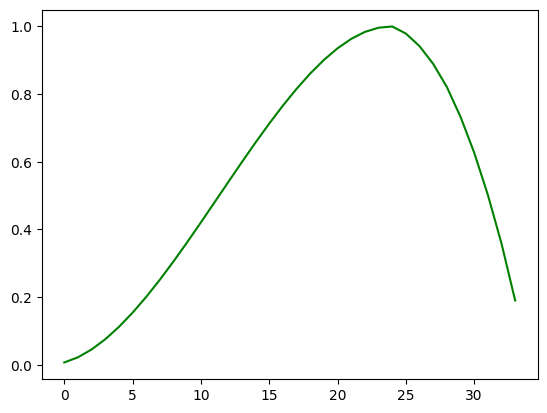

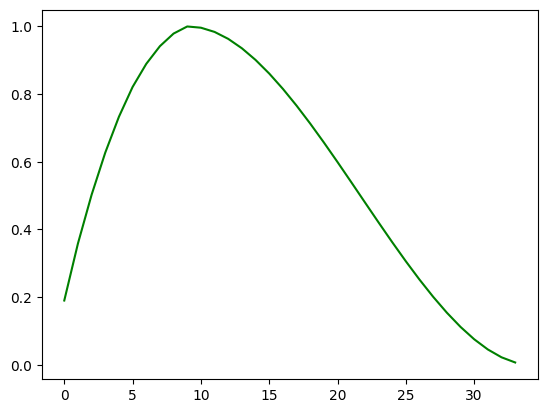

In [76]:
ranking = np.arange(35)

#ranking = 2*(ranking - min(ranking)) / (max(ranking) - min(ranking)) - 1
print(ranking)

loss_top_is_target = []
loss = []
for i in range(len(ranking)-1):
  pred_ranking = np.roll(ranking, -i-1)
  #pred_ranking = np.roll(ranking, i+1)
  print(pred_ranking)
  loss = top_is_target(ranking, pred_ranking )
  loss_top_is_target.append(loss)
  print("top_is_target: " + str(loss))

plt.figure()

loss_top_is_target = np.array(loss_top_is_target)

plt.plot(loss_top_is_target / loss_top_is_target.max(), 'g');

loss_top_is_target = []
print("############################")
for i in range(len(ranking)-1):
  pred_ranking = np.roll(ranking, i+1)
  #pred_ranking = np.roll(ranking, i+1)
  print(pred_ranking)
  loss = top_is_target(ranking, pred_ranking )
  loss_top_is_target.append(loss)
  print("top_is_target: " + str(loss))

plt.figure()

loss_top_is_target = np.array(loss_top_is_target)

plt.plot(loss_top_is_target / loss_top_is_target.max(), 'g');

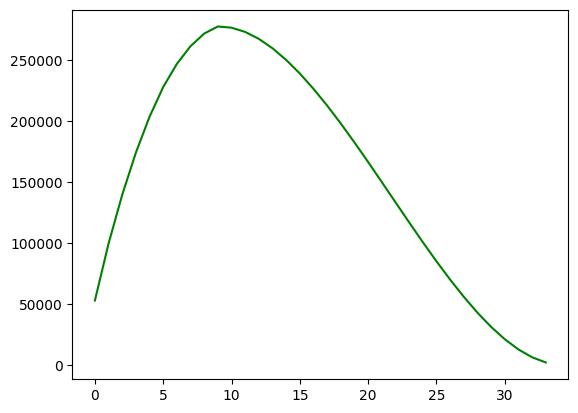

In [80]:
plt.plot(loss_top_is_target , 'g');

## MAX , MIN

In [ ]:
"""
loss_top_is_target[0]

[34  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33]

loss_top_is_target[-1]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34  0]

"""

In [81]:
loss_top_is_target.max(), loss_top_is_target.min()

(277500.0, 1872.0)

In [83]:
loss_top_is_target[0], loss_top_is_target[-1]

(52692.0, 1872.0)

## añadir margen de rror

In [77]:
y_true = np.array([1.,2.,3.,4.])
y_pred = np.array([4.,3.,2.,1.])

#y_true = K.cast(y_true, 'float32')
#y_pred = K.cast(y_pred, 'float32')


hp_top = 2
hp_incremento_top = 1.2



In [78]:
w = np.arange(len(y_true)).astype(float)
w = w[::-1] + 1
w[:hp_top] = w[:hp_top] * hp_incremento_top
w = K.cast(w, 'float32')
print(w)

tf.Tensor([4.8 3.6 2.  1. ], shape=(4,), dtype=float32)


In [79]:



r = K.cast(y_true, 'float32')
r_pred = K.cast(y_pred, 'float32')

rsultado = K.sum(w * K.square(r - r_pred), axis=-1)

# TODO AÑADIR MARGEN DE ERROR, si una posicion esta alejada X , no pasa nada